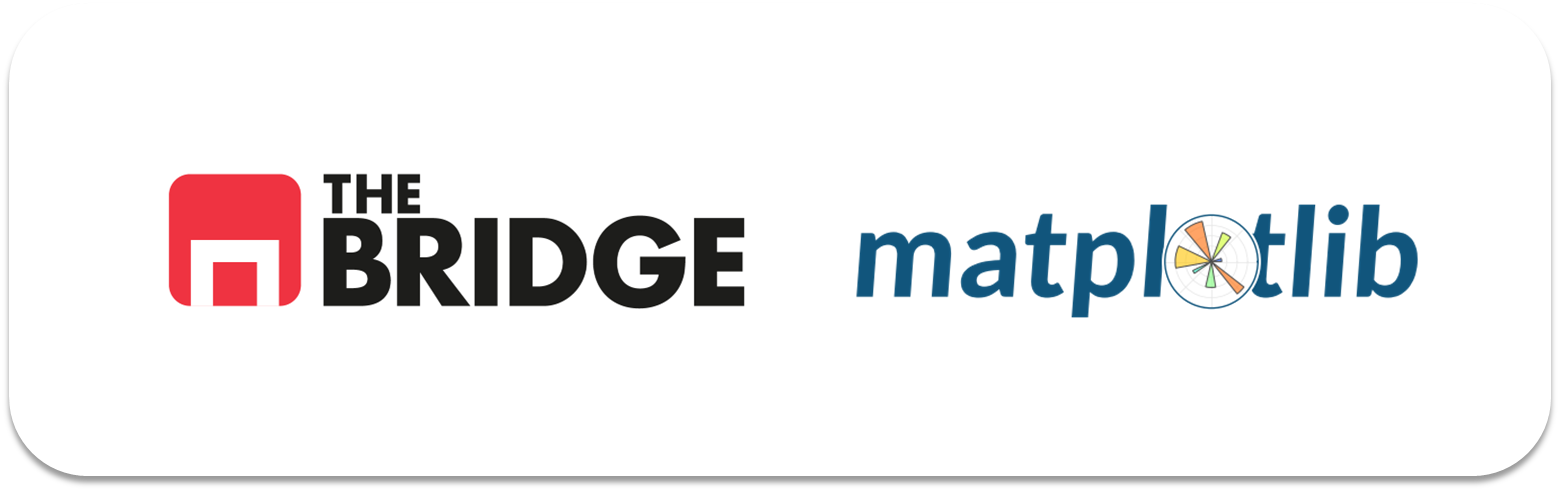

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [2]:
df=pd.read_csv("/Users/feeelfree/Desktop/Miguel/DATA/bootcamp/ONLINE_DS_THEBRIDGE_MMONTUENGA/SPRINT8/CHALLENGE/california_cities.csv")
df
df.describe()

,Unnamed: 0,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
count,482.000000,482.000000,482.000000,434.000000,470.000000,4.820000e+02,480.000000,482.000000,481.000000,477.000000,478.000000,478.000000,477.000000
mean,240.500000,36.095088,-119.837714,180.416705,567.168723,6.489493e+04,18.442183,16.840981,1.589630,46.753283,43.547021,3.125178,5.301801
std,139.285678,2.298006,2.147676,309.531825,1001.265722,2.032041e+05,36.363230,32.694647,9.490386,90.972269,84.933022,11.562269,14.656428
min,0.000000,32.578333,-124.263333,-34.000000,-180.000000,1.000000e+00,0.314000,0.314000,0.000000,0.813000,0.813000,0.000000,0.000000
25%,120.250000,33.977292,-121.954931,22.000000,69.000000,1.090200e+04,3.708250,3.506500,0.000000,9.551000,9.025000,0.000250,0.000000
50%,240.500000,36.204722,-119.708611,67.000000,200.000000,2.905750e+04,9.093000,8.362000,0.029000,23.551000,21.533000,0.078500,0.340000
75%,360.750000,37.886667,-117.977292,173.500000,515.000000,6.646650e+04,19.878250,19.090000,0.244000,51.772000,49.322000,0.623250,1.870000
max,481.000000,41.965000,-114.596389,2402.000000,7880.000000,3.884307e+06,503.000000,469.000000,185.020000,1302.000000,1214.000000,122.270000,84.580000


In [3]:
nan_info = pd.DataFrame({
    'Columna': df.columns,
    'Valores NaN': df.isnull().sum(),
    '% NaN': (df.isnull().mean() * 100).round(2)
})
nan_info
df= df.dropna()

In [4]:
df.city

0         Adelanto
1      AgouraHills
4         Alhambra
5       AlisoViejo
6          Alturas
          ...     
477     Yountville
478          Yreka
479       YubaCity
480        Yucaipa
481    YuccaValley
Name: city, Length: 427, dtype: object

/var/folders/l0/d46jbzjx3zn42ht7t50wsfnh0000gp/T/ipykernel_974/3147298536.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(df_top5_population['city'], rotation=45, ha='right')


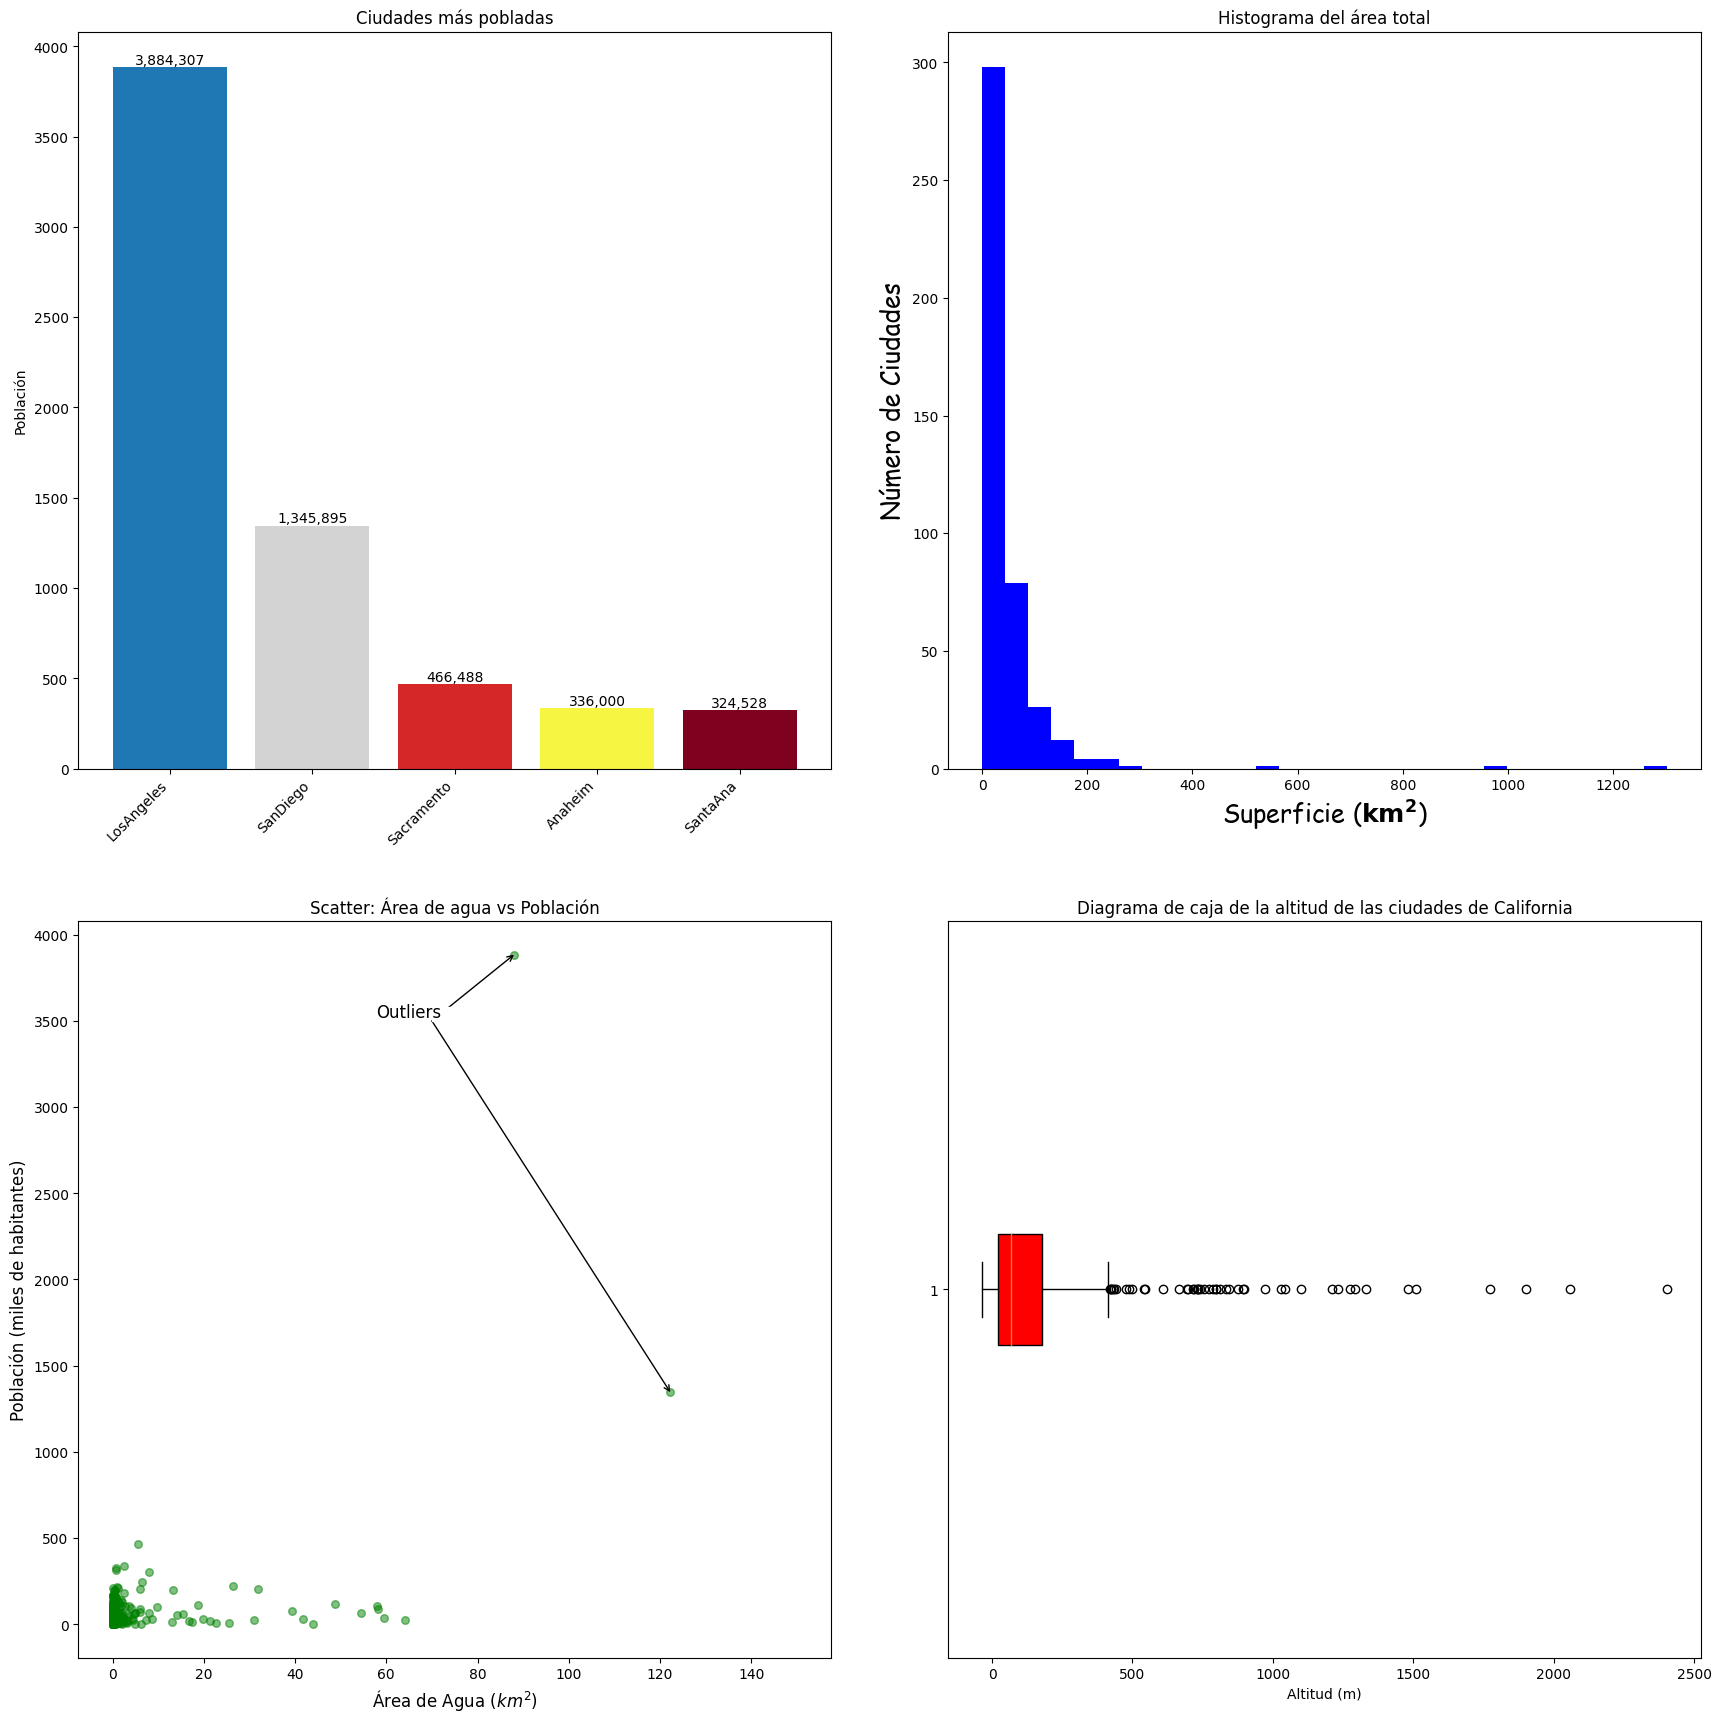

In [54]:
df_top5_population = df.sort_values(by='population_total', ascending=False).head(5)
fig, axs = plt.subplots(2, 2, figsize=(18, 18))



colors = ['#1f77b4', '#d3d3d3', '#d62728', '#f5f542', '#800020']
bars = axs[0, 0].bar(df_top5_population['city'], df_top5_population['population_total'], color=colors)

for bar, population in zip(bars, df_top5_population['population_total']):# Anotar cada barra con la población correspondiente
    yval = bar.get_height()    # Obtener la altura de la barra actual
    axs[0, 0].text(bar.get_x() + bar.get_width() / 2, yval, f'{population:,}', ha='center', va='bottom')    # Agregar texto sobre la barra indicando la población con formato de separadores de miles

axs[0, 0].set_title('Ciudades más pobladas')
axs[0, 0].set_ylabel('Población')
axs[0, 0].set_xticklabels(df_top5_population['city'], rotation=45, ha='right')
axs[0, 0].get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: '{:.0f}'.format(x / 1000))) # Formatear escala y en miles

axs[0, 1].hist(df['area_total_km2'].dropna(), bins=30, color='blue', edgecolor='none')
axs[0, 1].set_title('Histograma del área total')
axs[0, 1].set_xlabel('Superficie ($\mathbf{km^2}$)', fontfamily='Comic Sans MS', fontsize=18)
axs[0, 1].set_ylabel('Número de Ciudades', fontfamily='Comic Sans MS', fontsize=18)

axs[1, 0].scatter(df['area_water_km2'], df['population_total'] / 1000, color='green', alpha=0.5, s=30)
axs[1, 0].set_title('Scatter: Área de agua vs Población')
axs[1, 0].set_xlabel('Área de Agua ($\mathit{km^2}$)', fontsize=12)
axs[1, 0].set_ylabel('Población (miles de habitantes)', fontsize=12)

max_values = df.nlargest(2, 'population_total')# Identificar y anotar los dos valores máximos de población
origin = (70, 3500)

for index, row in max_values.iterrows():    # Para cada fila (ciudad) en el DataFrame de los dos valores máximos de población
    axs[1, 0].annotate('', xy=(row['area_water_km2'], row['population_total'] / 1000), #extremo de la flecha
                       xytext=origin,#origen de la flecha
                       arrowprops=dict(facecolor='red', arrowstyle='->', shrinkA=0, shrinkB=0),
                       ha='center')

axs[1, 0].add_patch(plt.Rectangle((70, 3500), 80, 80, color='white', zorder=4))# Agregar un rectángulo blanco en la posición específica
axs[1, 0].text(65, 3550, 'Outliers', ha='center', va='center', fontsize=12, color='black', zorder=5)# Agregar texto indicando "Outliers" en la posición específica

df_filtered = df.dropna(subset=['elevation_m'])
axs[1, 1].boxplot(df_filtered['elevation_m'], vert=False, widths=0.15, patch_artist=True,
                   boxprops=dict(facecolor='red'))

axs[1, 1].set_title('Diagrama de caja de la altitud de las ciudades de California')
axs[1, 1].set_xlabel('Altitud (m)')
axs[1, 1].set_yticks([1])

plt.tight_layout(pad=3.5)
plt.show()


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center").
2. Histograma del área total ocupada por las ciudades.
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

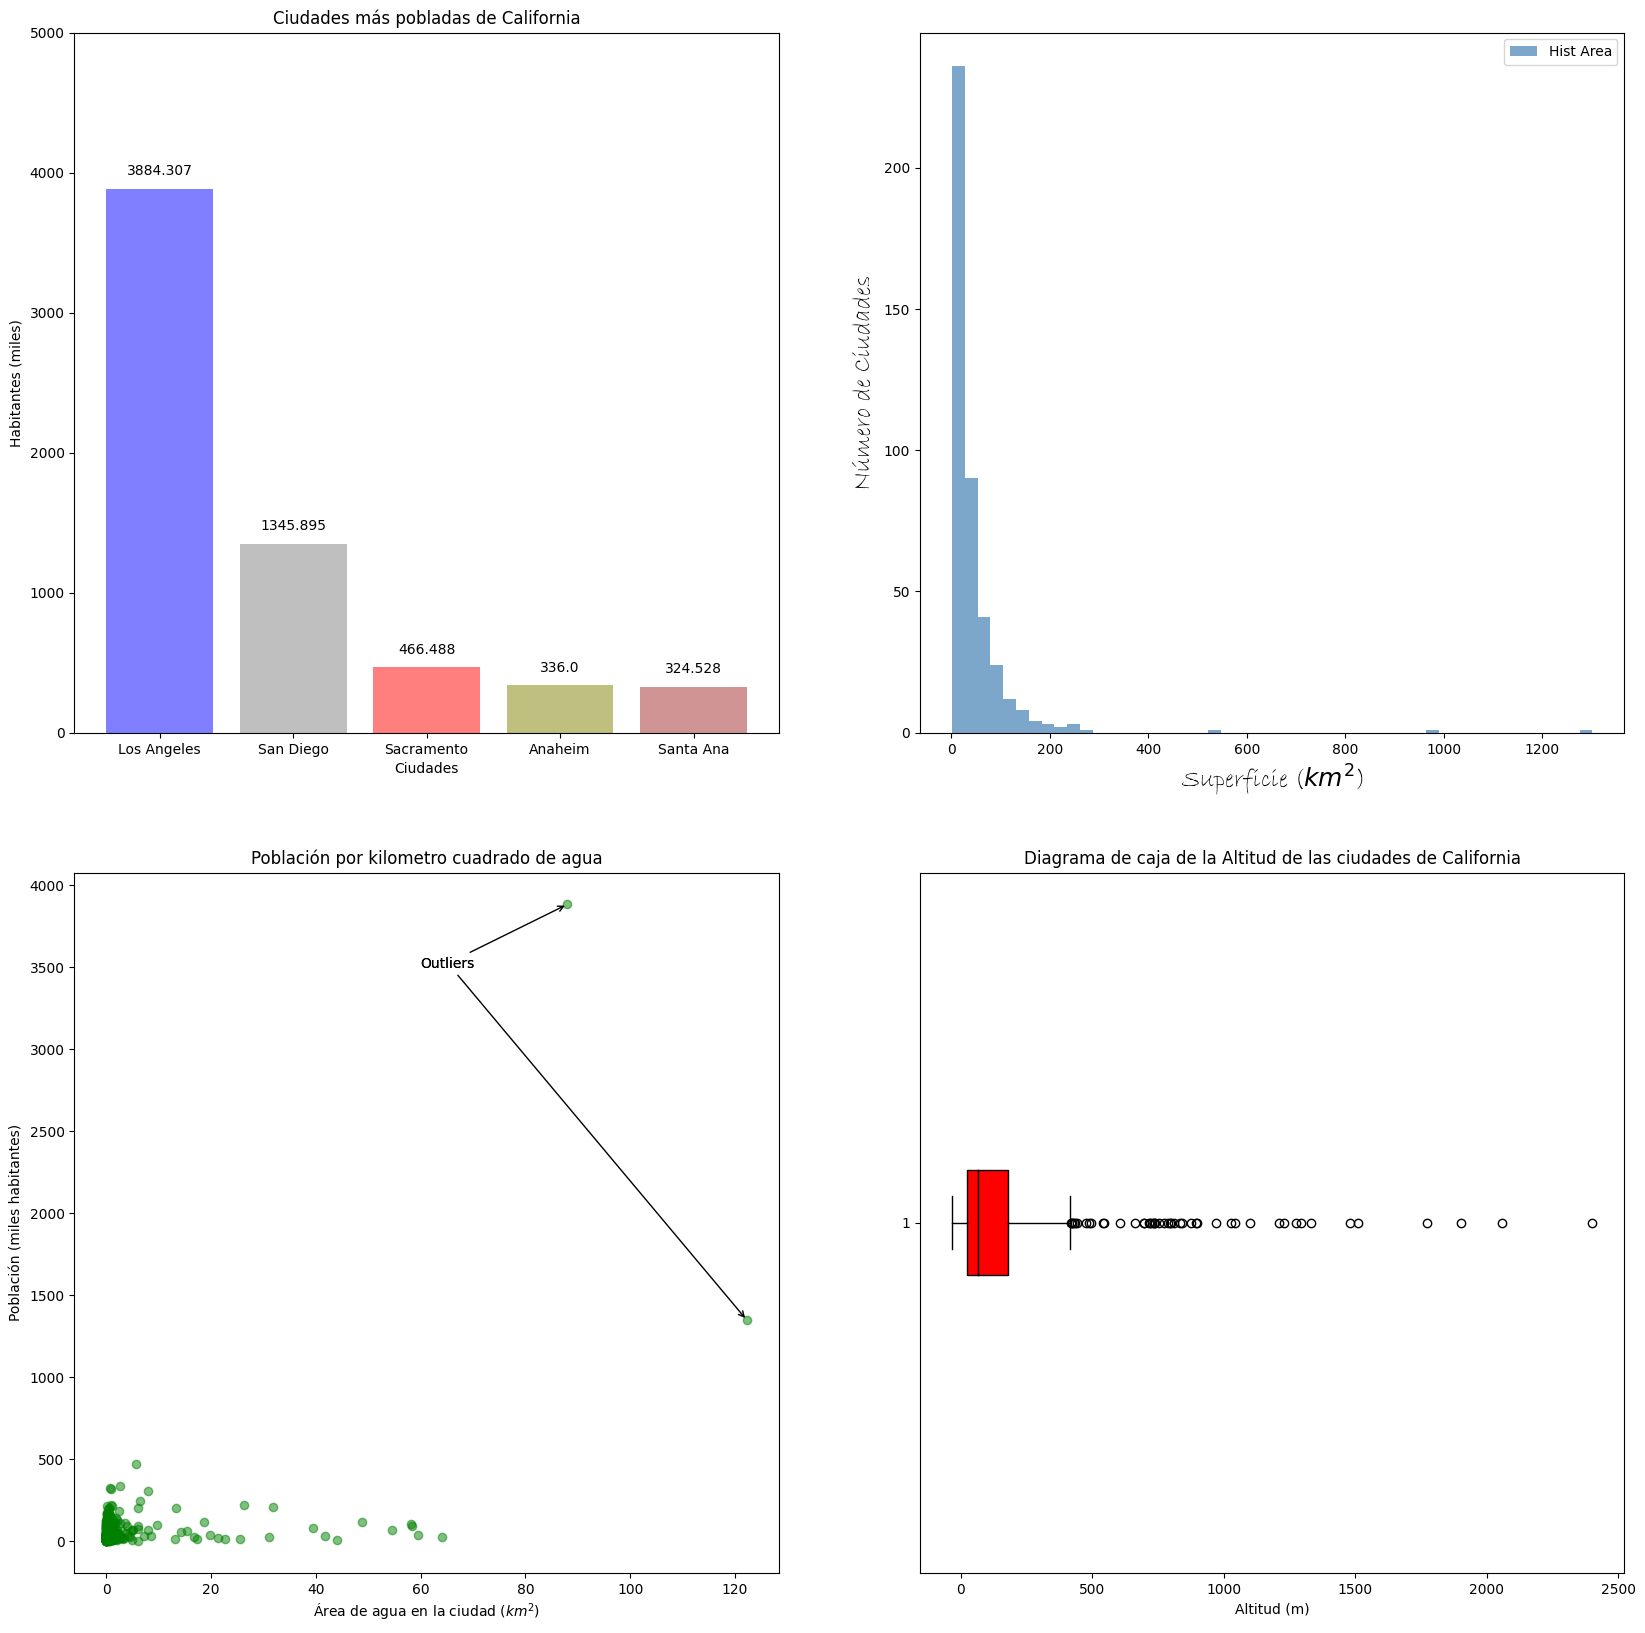

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.